# Access and Download the data

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/rahulsah06/titanic'
od.download(download_url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [4]:
data_filename = './titanic/train.csv'

# Download packages

In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Previewing data

In [6]:
#This is just to preview the first few rows of the dataframe

titanic_df = pd.read_csv(data_filename)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#This gives information about every column, the character type 
#and the number of entries

titanic_df.info()

#The columns which are inconsistent are Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#The .unique() function allows one to preview the distinct values 
#in each column

In [9]:
titanic_df['Survived'].unique()

array([0, 1])

In [10]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [11]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
titanic_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
#The histograms allow us to understand the distribution of the data 
#in each column; the min, max and median values

<AxesSubplot:>

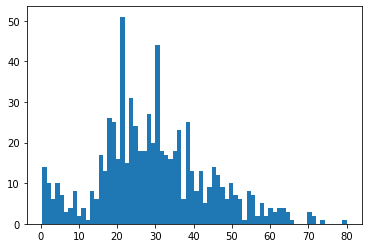

In [15]:
titanic_df['Age'].hist(bins=70,grid=0)

<AxesSubplot:>

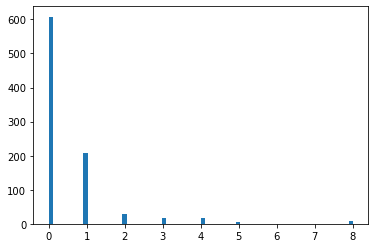

In [16]:
titanic_df['SibSp'].hist(bins=70,grid=0)

<AxesSubplot:>

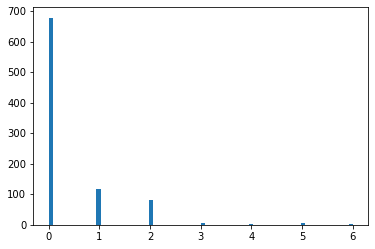

In [17]:
titanic_df['Parch'].hist(bins=70,grid=0)

# Analysis Section

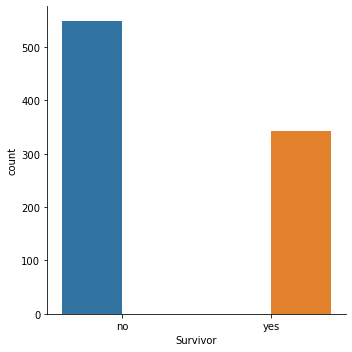

In [18]:
#Plotting those who Survived and those that died
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot(x='Survivor',kind='count',data=titanic_df,hue='Survivor')

## Overall Gender Breakdown

### There are overall more male deaths than female deaths although the difference is not very great.

In [19]:
#Classifying all passengers under the age of 16 as children in the 
#gender column

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [56]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [21]:
#Counting the number of males, females and children

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

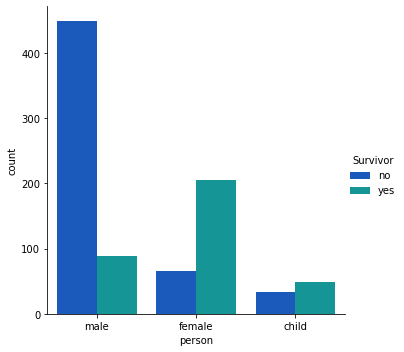

In [22]:
sns.catplot(x='person',kind='count',data=titanic_df,hue='Survivor'
            ,palette='winter')

## Overall Passenger Class Breakdown

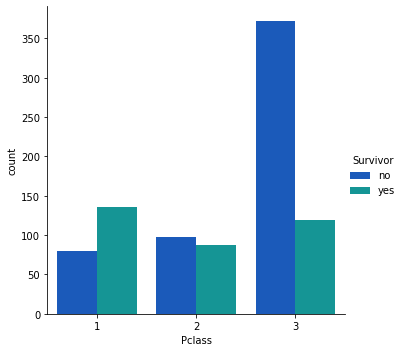

In [23]:
sns.catplot(x='Pclass',kind='count',data=titanic_df,hue='Survivor',palette='winter')

## Age Breakdown

### Passenger below the age of 16 were classed as children using the script below

In [24]:
#Understanding the avergae age
titanic_df['Age'].mean()

29.69911764705882

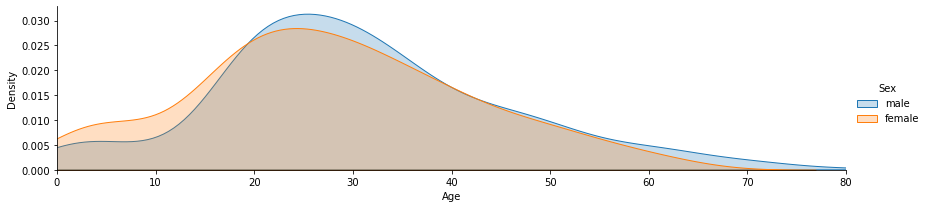

In [25]:
#Plotting the age distribution of males and females
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

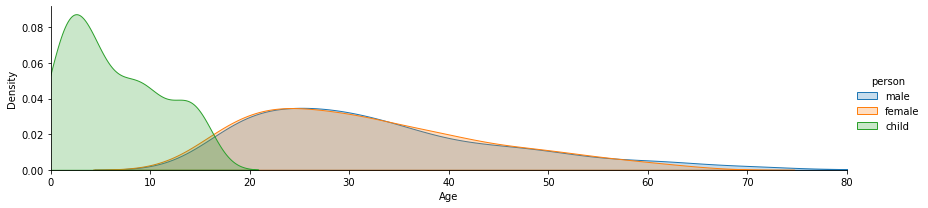

In [26]:
#Plotting the age distribution of males, females and children

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

## Summary Analysis of Class, Age and Gender Breakdown

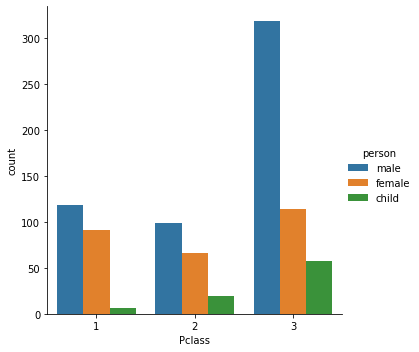

In [27]:
sns.catplot(x='Pclass',kind='count',data=titanic_df,hue='person')

## Analysis of Deaths by Cabin Levels

In [28]:
#Obtaining the first character(letter) from each cabin seat to analyse passengers 
#on each cabin level

levels = []
for level in titanic_df['Cabin']:
    levels.append(str(level)[0])


titanic_df['New_Cabin'] = levels

In [29]:
#Including those who Survived and those that died
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,male,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,female,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,male,n


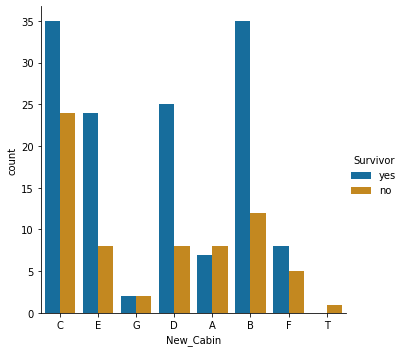

In [30]:
titanic_dff = titanic_df[titanic_df.New_Cabin != 'n']


#titanic_dfff= pd.DataFrame.sort_values(titanic_dff,ascending=False)
                                       
sns.catplot(x='New_Cabin', kind='count', data=titanic_dff, hue='Survivor', 
            palette='colorblind')

## Port of Embarkation Breakdown

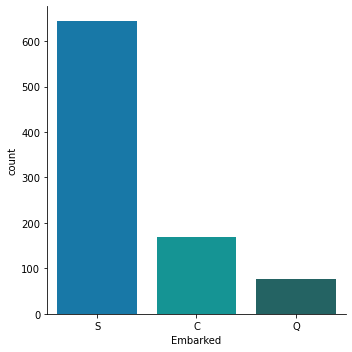

In [31]:
sns.catplot(x='Embarked',kind='count', data=titanic_df, palette='winter_d')

## Analysis of Passenger Deaths and Family Relations

### Perhaps passengers with family would have fought more to survive than those with no family

In [51]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch 

#Parch represents parent child

In [52]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,person,New_Cabin,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,male,n,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,female,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,female,n,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,female,C,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,male,n,Alone


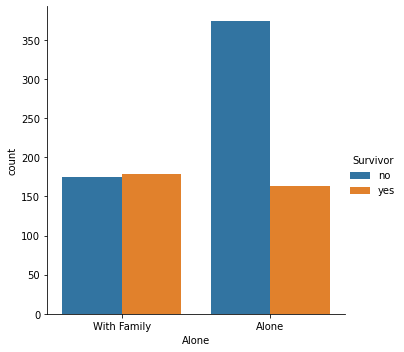

In [54]:
#Plot of those with family and those without

sns.catplot(x='Alone',kind='count',data=titanic_df, hue='Survivor')

## Relationship between Survival and Passenger Class

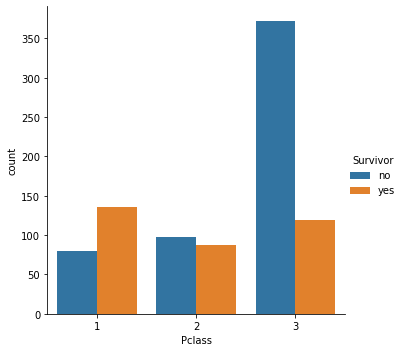

In [40]:
lim = sns.catplot(x='Pclass',kind='count',data=titanic_df,hue='Survivor')
lim.set(ylim=(0,None))

## A Further Breakdown of This Relationship According to Gender

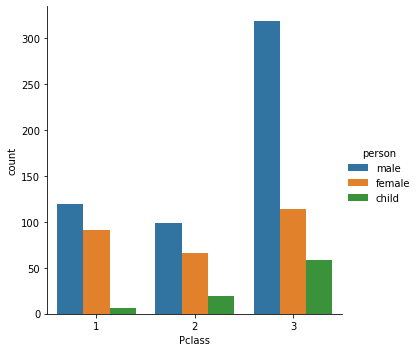

In [42]:
lim = sns.catplot(x='Pclass',kind='count', hue='person', data=titanic_df)
lim.set(ylim=(-0.2,None))

## Relationship between Survival and Age

/Users/annetteamoa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


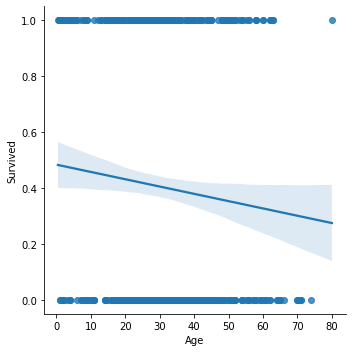

In [43]:
sns.lmplot('Age','Survived', data=titanic_df)